<a href="https://colab.research.google.com/github/BautistaDavid/Machine-Learning-Class-2022/blob/main/ejercicio7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
import pandas as pd

In [180]:
df = pd.read_csv('https://raw.githubusercontent.com/BautistaDavid/proyectos/main/economicas.csv')
df.columns = [i.lower() for i in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   estu_consecutivo                3855 non-null   object 
 1   result_codigoprueba             3855 non-null   int64  
 2   result_nombreprueba             3855 non-null   object 
 3   result_puntaje                  3855 non-null   int64  
 4   result_desempeno                3855 non-null   int64  
 5   estu_agregado                   3855 non-null   object 
 6   estu_tipodocumento              3855 non-null   object 
 7   estu_nacionalidad               3855 non-null   object 
 8   estu_genero                     3855 non-null   object 
 9   estu_fechanacimiento            3855 non-null   object 
 10  estu_exterior                   3855 non-null   object 
 11  periodo                         3855 non-null   int64  
 12  estu_estudiante                 38

In [181]:
df = df[['estu_genero','estu_fechanacimiento','estu_depto_reside', 'fami_educacionpadre','fami_educacionmadre',
       'estu_presentacioncasa', 'estu_prgm_academico', 'estu_metodo_prgm', 'estu_nucleo_pregrado', 'mod_razona_cuantitat_punt',
       'mod_lectura_critica_punt', 'mod_competen_ciudada_punt', 'mod_ingles_punt', 'mod_comuni_escrita_punt', 'punt_global','percentil_global']]

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   estu_genero                3855 non-null   object
 1   estu_fechanacimiento       3855 non-null   object
 2   estu_depto_reside          3855 non-null   object
 3   fami_educacionpadre        3760 non-null   object
 4   fami_educacionmadre        3755 non-null   object
 5   estu_presentacioncasa      3855 non-null   object
 6   estu_prgm_academico        3855 non-null   object
 7   estu_metodo_prgm           3855 non-null   object
 8   estu_nucleo_pregrado       3855 non-null   object
 9   mod_razona_cuantitat_punt  3855 non-null   int64 
 10  mod_lectura_critica_punt   3855 non-null   int64 
 11  mod_competen_ciudada_punt  3855 non-null   int64 
 12  mod_ingles_punt            3855 non-null   int64 
 13  mod_comuni_escrita_punt    3855 non-null   int64 
 14  punt_glo

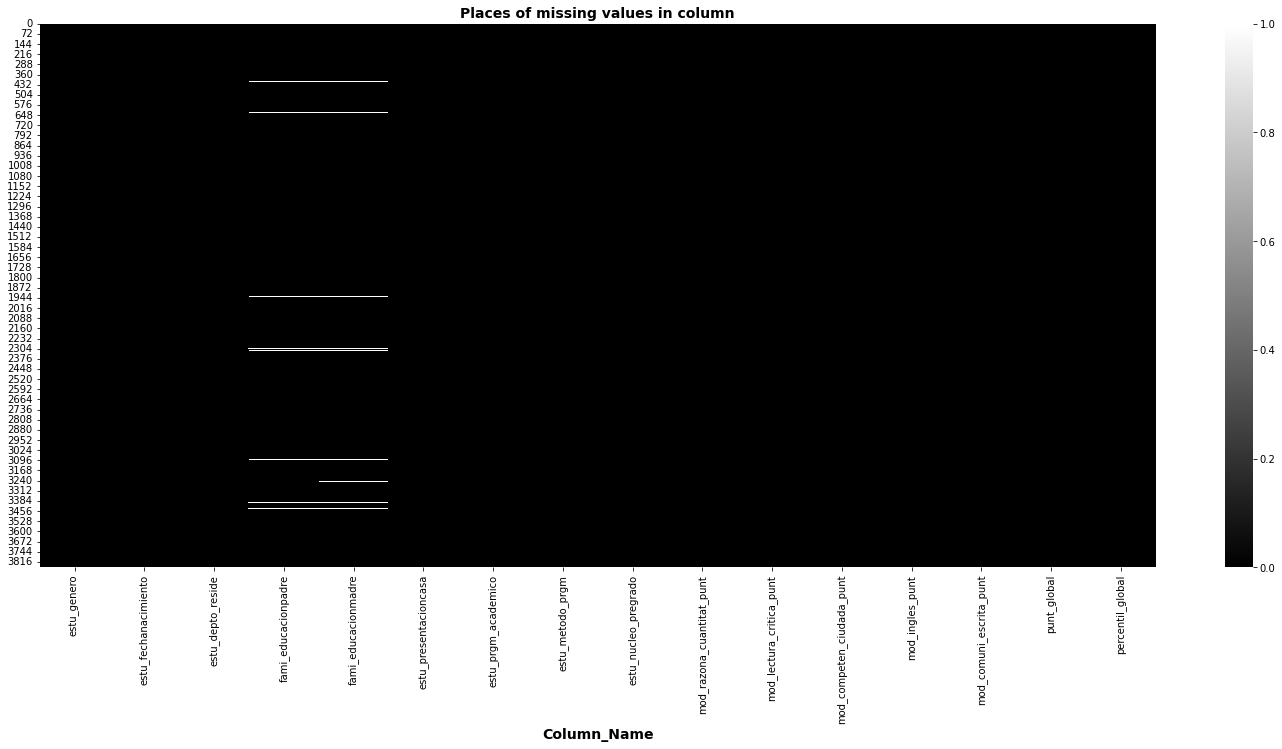

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25, 10))
sns.heatmap(df.isnull(), cbar=True, cmap='gray')  # .isnull() is going to give you a DataFrame with True or False... and remeber that ( True = 1 , False = 0)  
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=14)
plt.show()

In [184]:
def dic_depto():
    dic = {'BOGOTÁ':'Region Andina','ANTIOQUIA':'Region Andina','VALLE':'Region Pacifica',
    'CUNDINAMARCA':'Region Andina','ATLANTICO':'Region Caribe','SANTANDER':'Region Andina',
    'BOLIVAR':'Region Caribe','CORDOBA':'Region Caribe','NARIÑO':'Region Pacifica',
    'BOYACA':'Region Andina', 'MAGDALENA':'Region Caribe', 'TOLIMA':'Region Andina',
    'NORTE SANTANDER':'Region Andina','HUILA':'Region Andina','CAUCA':'Region Pacifica',
    'CESAR':'Region Caribe','META':'Region Orinoquia','SUCRE':'Region Caribe',
    'RISARALDA':'Region Andina','CALDAS':'Region Andina','LA GUAJIRA':'Region Caribe',
    'QUINDIO':'Region Andina','CASANARE':'Region Orinoquia','CHOCO':'Region Pacifica',
    'CAQUETA':'Region Amazonica','PUTUMAYO':'Region Amazonica','ARAUCA':'Region Orinoquia',
    'GUAVIARE':'Region Orinoquia','AMAZONAS':'Region Amazonica','SAN ANDRES':'Region Caribe',
    'VICHADA':'Region Orinoquia','VAUPES':'Region Amazonica','GUAINIA':'Region Amazonica'}
    return dic  


def dic_educacion():
    dic = {'Secundaria (Bachillerato) completa': 11,
            'Primaria incompleta': 3,
            'Secundaria (Bachillerato) incompleta':8,
            'Primaria completa':5,
            'Educación profesional completa':15,
            'Técnica o tecnológica completa':13,
            'No sabe':0,
            '-':0,
            'Ninguno':0,
            'Técnica o tecnológica incompleta':12,
            'Educación profesional incompleta':14,
            'Postgrado':17,
            'No Aplica':0}
    return dic

In [185]:
df['fami_educacionpadre'].replace(dic_educacion(),inplace =True)
df['fami_educacionpadre'].fillna(df['fami_educacionpadre'].mean(), inplace=True)

df['fami_educacionmadre'].replace(dic_educacion(),inplace =True)
df['fami_educacionmadre'].fillna(df['fami_educacionpadre'].mean(), inplace=True)

df['region'] = df['estu_depto_reside'].replace(dic_depto())
df['edad'] = [2020 - int(value.split('/')[2]) for value in df['estu_fechanacimiento']]
df['edad'].replace({edad:int(df['edad'].mean()) for edad in [2018,2019,5,110,120,2,1,9,6,3,4,7,8,11,10]},inplace=True)

# df['estu_semestrecursa'].fillna({'12 o más':12})
# df['estu_semestrecursa'].replace({'12 o más':12}, inplace = True)

# df['estu_semestrecursa'] = df['estu_semestrecursa'].astype('int8', errors='ignore')

# df['fami_estratovivienda'].replace({'Estrato':'Estrato 3'}, inplace =True)
# df = df[df['fami_estratovivienda'].isna().replace({True:False,False:True})]
# # df2 = df2[df2['fami_estratovivienda'].isna().replace({True:False,False:True})]
# df['fami_estratovivienda'] = [val.split(' ')[1] for val in df['fami_estratovivienda']]
# df['fami_estratovivienda'] = df['fami_estratovivienda'].astype('int8')



In [186]:
df

,estu_genero,estu_fechanacimiento,estu_depto_reside,fami_educacionpadre,fami_educacionmadre,estu_presentacioncasa,estu_prgm_academico,estu_metodo_prgm,estu_nucleo_pregrado,mod_razona_cuantitat_punt,mod_lectura_critica_punt,mod_competen_ciudada_punt,mod_ingles_punt,mod_comuni_escrita_punt,punt_global,percentil_global,region,edad
0,M,14/10/1996,CUNDINAMARCA,11.000000,13.000000,Si,ECONOMIA,DISTANCIA VITUAL,ECONOMÍA,207,151,186,300,159,201,99,Region Andina,24
1,M,17/02/2001,BOGOTÁ,15.000000,15.000000,Si,ECONOMIA,PRESENCIAL,ECONOMÍA,201,192,206,210,300,222,100,Region Andina,19
2,M,02/10/1991,ATLANTICO,3.000000,3.000000,Si,FINANZAS Y COMERCIO INTERNACIONAL,PRESENCIAL,ECONOMÍA,101,109,98,132,0,88,2,Region Caribe,29
3,F,23/07/1998,BOGOTÁ,15.000000,14.000000,Si,ECONOMÍA,DISTANCIA VITUAL,ECONOMÍA,146,186,173,187,101,159,71,Region Andina,22
4,M,23/09/1997,BOGOTÁ,3.000000,13.000000,Si,ECONOMIA,PRESENCIAL,ECONOMÍA,158,175,165,163,117,156,67,Region Andina,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,M,18/03/1996,VALLE,17.000000,17.000000,Si,ECONOMIA,PRESENCIAL,ECONOMÍA,198,193,209,202,180,196,98,Region Pacifica,24
3851,F,26/07/2000,BOGOTÁ,17.000000,17.000000,Si,ECONOMIA,PRESENCIAL,ECONOMÍA,176,207,208,204,166,192,97,Region Andina,20
3852,F,30/01/1989,BOGOTÁ,3.000000,13.000000,Si,ECONOMIA,PRESENCIAL,ECONOMÍA,143,155,144,189,159,158,70,Region Andina,31
3853,F,23/04/1998,ATLANTICO,11.000000,11.000000,Si,ECONOMIA,PRESENCIAL,ECONOMÍA,111,94,89,184,108,117,15,Region Caribe,22


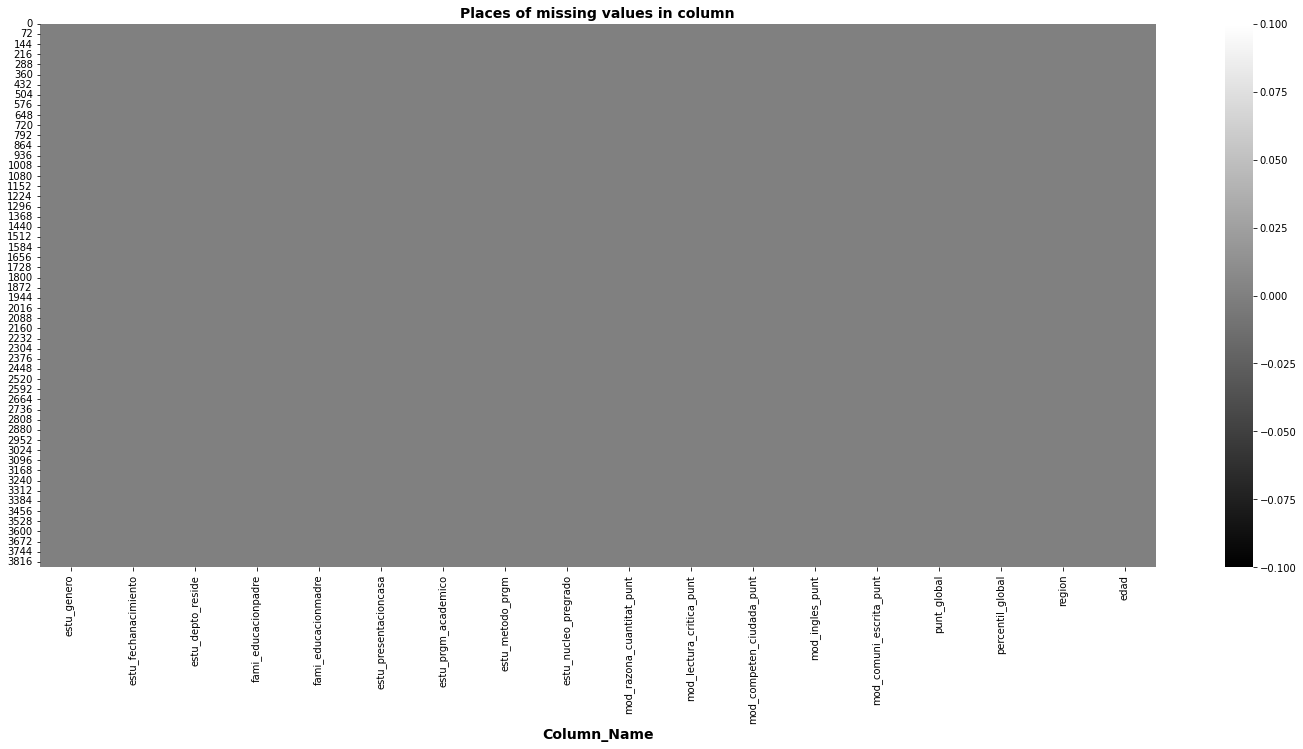

In [187]:
plt.figure(figsize=(25, 10))
sns.heatmap(df.isnull(), cbar=True, cmap='gray')  # .isnull() is going to give you a DataFrame with True or False... and remeber that ( True = 1 , False = 0)  
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=14)
plt.show()

In [188]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print()

estu_genero
['M' 'F']

estu_fechanacimiento
['14/10/1996' '17/02/2001' '02/10/1991' ... '18/03/1996' '30/01/1989'
 '13/02/1996']

estu_depto_reside
['CUNDINAMARCA' 'BOGOTÁ' 'ATLANTICO' 'VALLE' 'ANTIOQUIA' 'NARIÑO'
 'RISARALDA' 'HUILA' 'SANTANDER' 'QUINDIO' 'TOLIMA' 'CAQUETA' 'MAGDALENA'
 'SUCRE' 'NORTE SANTANDER' 'BOLIVAR' 'BOYACA' 'META' 'CAUCA' 'CALDAS'
 'CORDOBA' 'CASANARE' 'LA GUAJIRA' 'ARAUCA' 'CESAR' 'PUTUMAYO' 'AMAZONAS'
 'EXTRANJERO' 'CHOCO' 'SAN ANDRES' 'GUAVIARE']

fami_educacionpadre
[11.        15.         3.         5.        17.        13.
 14.         8.        12.         0.        10.1893617]

fami_educacionmadre
[13.        15.         3.        14.        11.        17.
  8.        12.         0.         5.        10.1893617]

estu_presentacioncasa
['Si' 'No']

estu_prgm_academico
['ECONOMIA' 'FINANZAS Y COMERCIO INTERNACIONAL' 'ECONOMÍA'
 'COMERCIO EXTERIOR' 'COMERCIO Y NEGOCIOS INTERNACIONALES'
 'NEGOCIOS INTERNACIONALES' 'ECONOM¿A' 'COMERCIO INTERNACIONAL'
 'RELAC

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   estu_genero                3855 non-null   object 
 1   estu_fechanacimiento       3855 non-null   object 
 2   estu_depto_reside          3855 non-null   object 
 3   fami_educacionpadre        3855 non-null   float64
 4   fami_educacionmadre        3855 non-null   float64
 5   estu_presentacioncasa      3855 non-null   object 
 6   estu_prgm_academico        3855 non-null   object 
 7   estu_metodo_prgm           3855 non-null   object 
 8   estu_nucleo_pregrado       3855 non-null   object 
 9   mod_razona_cuantitat_punt  3855 non-null   int64  
 10  mod_lectura_critica_punt   3855 non-null   int64  
 11  mod_competen_ciudada_punt  3855 non-null   int64  
 12  mod_ingles_punt            3855 non-null   int64  
 13  mod_comuni_escrita_punt    3855 non-null   int64

In [191]:
pivot1 = pd.pivot_table(data = df,index =['region'], values = 'punt_global' ,columns =['estu_genero'],aggfunc = 'count')
pivot1

estu_genero,F,M
region,,
EXTRANJERO,1.0,NaN
Region Amazonica,7.0,5.0
Region Andina,1278.0,1372.0
Region Caribe,302.0,278.0
Region Orinoquia,82.0,64.0
Region Pacifica,275.0,191.0


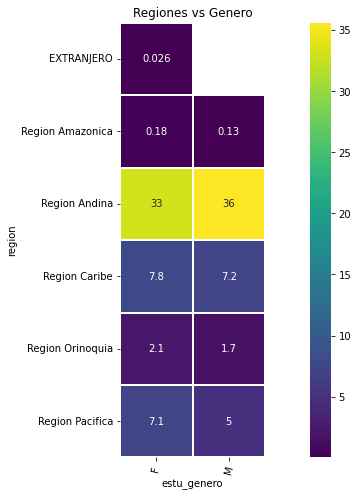

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(16,8))
# graphics_style()
plt.title('Regiones vs Genero')
plt.xticks(rotation = 75)
pivot1_heat = sns.heatmap((pivot1 *100)/len(df), cmap="viridis",linewidth=1, linecolor='w', square=True, annot = True,
                          annot_kws={"size":10})

In [202]:
pivot2 = pd.pivot_table(data = df,index =['region'], values = 'punt_global' ,columns =['estu_prgm_academico'],aggfunc = 'count')
pivot2

estu_prgm_academico,ADMINISTRACION DE EMPRESAS,COMERCIO EXTERIOR,COMERCIO INTERNACIONAL,COMERCIO Y NEGOCIOS INTERNACIONALES,ECONOMIA,ECONOMIA Y FINANZAS INTERNACIONALES,ECONOMIA Y NEGOCIOS INTERNACIONALES,ECONOM¿A,ECONOMÍA,FINANZAS Y COMERCIO EXTERIOR,FINANZAS Y COMERCIO INTERNACIONAL,NEGOCIOS INTERNACIONALES,RELACIONES ECONOMICAS INTERNACIONALES
region,,,,,,,,,,,,,
EXTRANJERO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Region Amazonica,NaN,1.0,NaN,NaN,4.0,NaN,NaN,NaN,3.0,NaN,1.0,3.0,NaN
Region Andina,13.0,15.0,136.0,20.0,1655.0,34.0,1.0,NaN,180.0,49.0,249.0,255.0,43.0
Region Caribe,NaN,NaN,19.0,67.0,420.0,1.0,NaN,NaN,58.0,NaN,13.0,1.0,1.0
Region Orinoquia,NaN,NaN,3.0,NaN,53.0,NaN,NaN,NaN,8.0,NaN,8.0,74.0,NaN
Region Pacifica,NaN,81.0,44.0,NaN,184.0,1.0,94.0,43.0,15.0,NaN,1.0,3.0,NaN


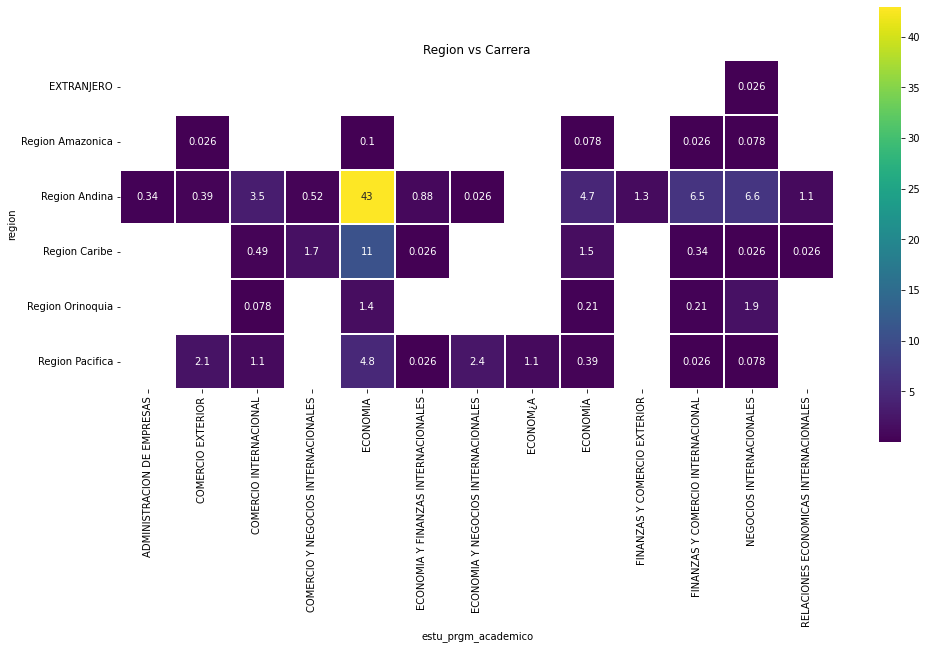

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(16,8))
# graphics_style()
plt.title('Region vs Carrera')
plt.xticks(rotation = 75)
pivot1_heat = sns.heatmap((pivot2 *100)/len(df), cmap="viridis",linewidth=1, linecolor='w', square=True, annot = True,
                          annot_kws={"size":10})

In [204]:
pivot3 = pd.pivot_table(data = df,index =['region'], values = 'punt_global' ,columns =['estu_prgm_academico'],aggfunc = 'count')
pivot3

In [205]:
df.columns

Index(['estu_genero', 'estu_fechanacimiento', 'estu_depto_reside',
       'fami_educacionpadre', 'fami_educacionmadre', 'estu_presentacioncasa',
       'estu_prgm_academico', 'estu_metodo_prgm', 'estu_nucleo_pregrado',
       'mod_razona_cuantitat_punt', 'mod_lectura_critica_punt',
       'mod_competen_ciudada_punt', 'mod_ingles_punt',
       'mod_comuni_escrita_punt', 'punt_global', 'percentil_global', 'region',
       'edad'],
      dtype='object')

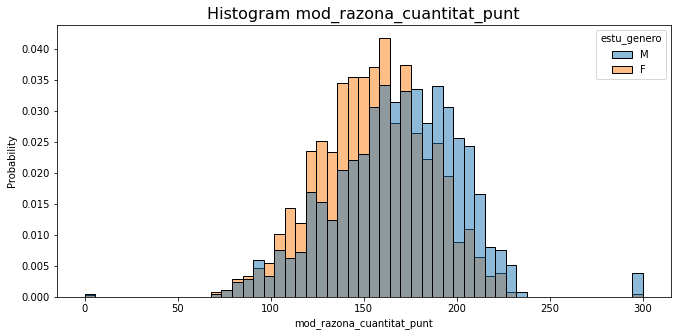

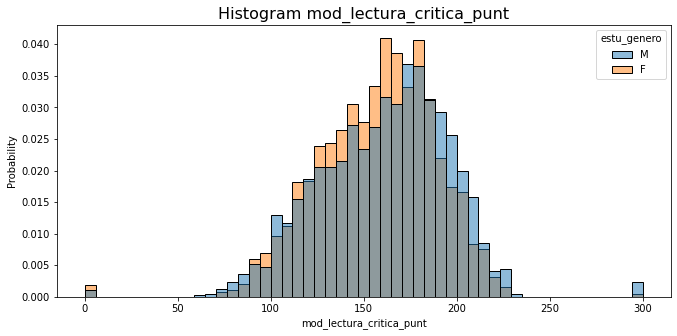

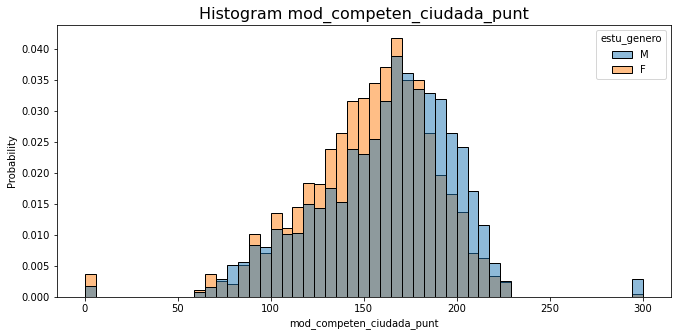

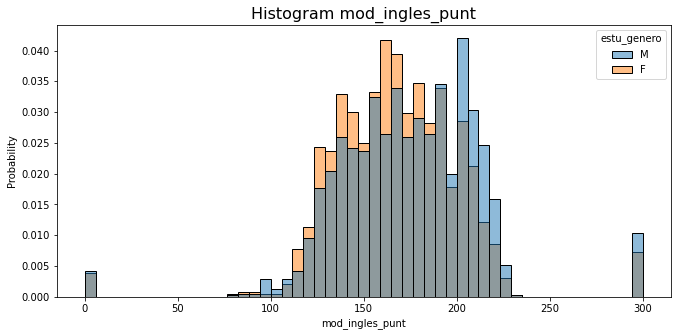

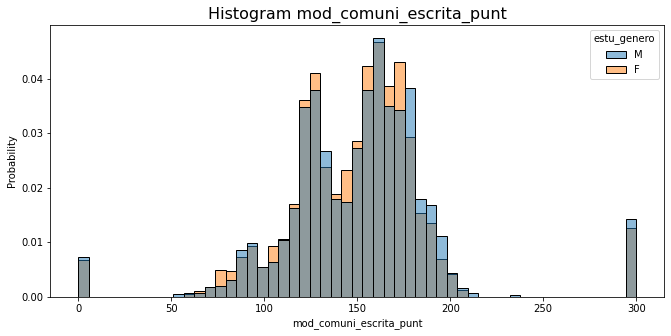

In [207]:
scores = df[['mod_razona_cuantitat_punt', 'mod_lectura_critica_punt',
       'mod_competen_ciudada_punt', 'mod_ingles_punt',
       'mod_comuni_escrita_punt']]
for i in scores.columns:
  plt.figure(figsize = (11,5))
  plt.title(f'Histogram {i}', fontsize = 16)
  sns.histplot(data = df, x = i, hue = 'estu_genero', stat = 'probability')
  plt.show()



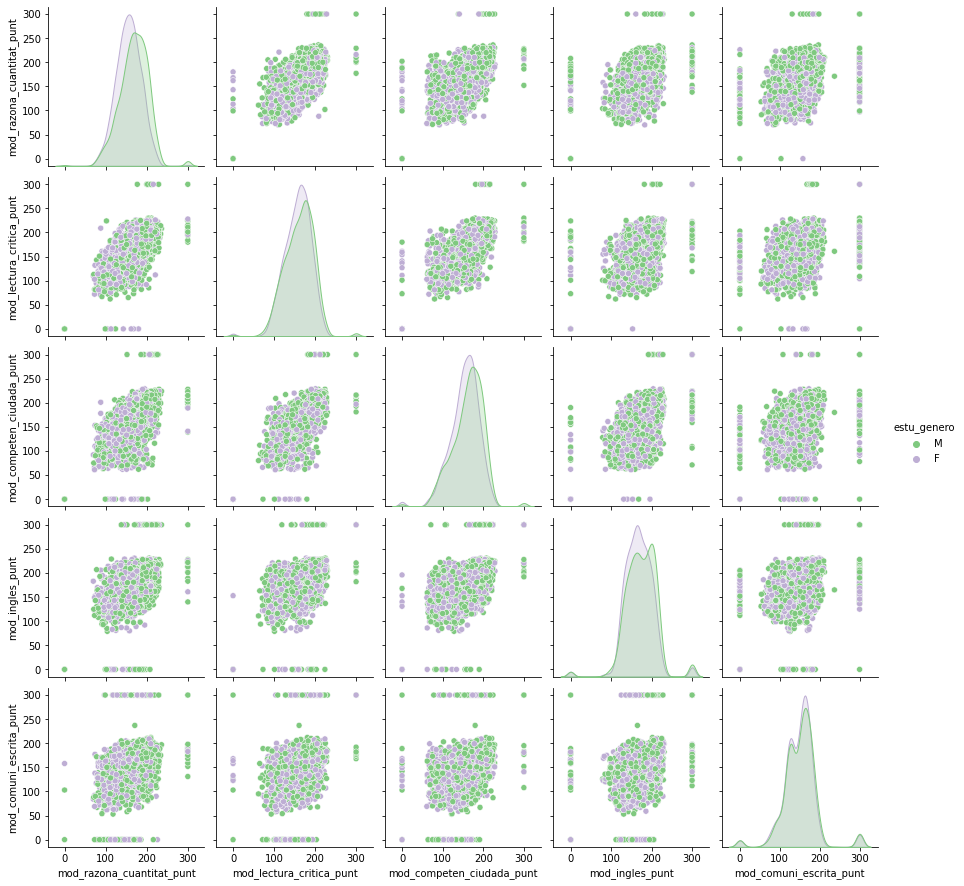

In [209]:
vars = list(scores.columns)
data_ = df[vars + ['estu_genero']]
sns.pairplot(data_,hue ='estu_genero',palette = 'Accent')

In [210]:
df.to_csv('data.csv')